In [66]:
import sys  
sys.path.insert(1, '/Users/simon/Documents/II/Dissertation/')
%load_ext autoreload
%autoreload 2
from src.misc import load_processed_dataset, split_data, load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mlflow

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Results

In [80]:
df = load_processed_dataset("aapl")
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Close Forecast', 'close_t-1', 'close_t-2', 'close_t-3', 'close_t-4',
       'close_t-5', 'pct_change', 'return', 'dayofweek', 'quarter', 'month',
       'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'upper_band',
       'middle_band', 'lower_band', 'SMA_3', 'SMA_5', 'SMA_10', 'SMA_20',
       'SMA_50', 'EMA_3', 'EMA_5', 'EMA_10', 'EMA_20', 'EMA_50', 'ADX',
       'aroon_down', 'aroon_up', 'macd', 'macdsignal', 'macdhist', 'RSI_14',
       'slow_k', 'slow_d', 'williams_r', 'AD', 'OBV', 'NATR', 'TRANGE',
       'fed_funds_rate', '^N225', '^IXIC', '^FTSE', '^SPX', '^DJI'],
      dtype='object')

In [91]:
stocks = ["MSFT", "AAPL", "NVDA", "AMZN", "META", "GOOG", "BRK-B", "LLY", "AVGO", "TSLA", "JPM", "UNH", "V", "XOM", "JNJ", "MA", "PG", "HD", "MRK", "COST"]
stocks = ["MSFT", "AAPL", "BRK-B"]

R^2: 0.9055285078814309
MSE: 29.238598124911327
RMSE: 5.407272706726685
MAE: 3.939963931129094
MAPE: 1.6054926824322004


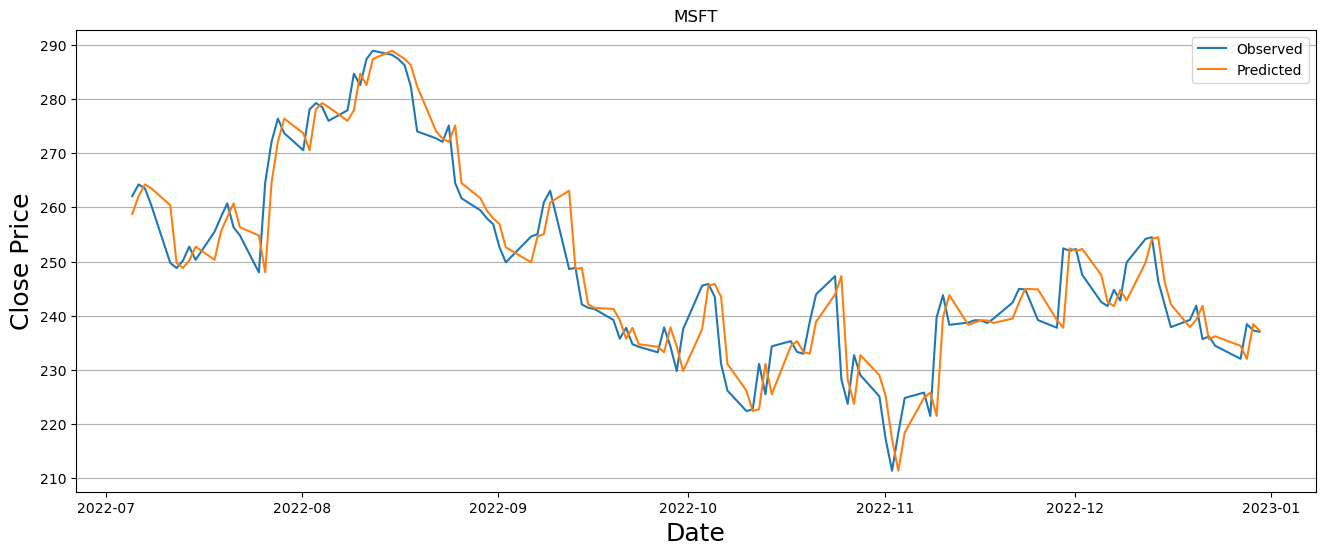

R^2: 0.9052672443982556
MSE: 10.864161256797766
RMSE: 3.2960827138889837
MAE: 2.503579518151662
MAPE: 1.7006109697709257


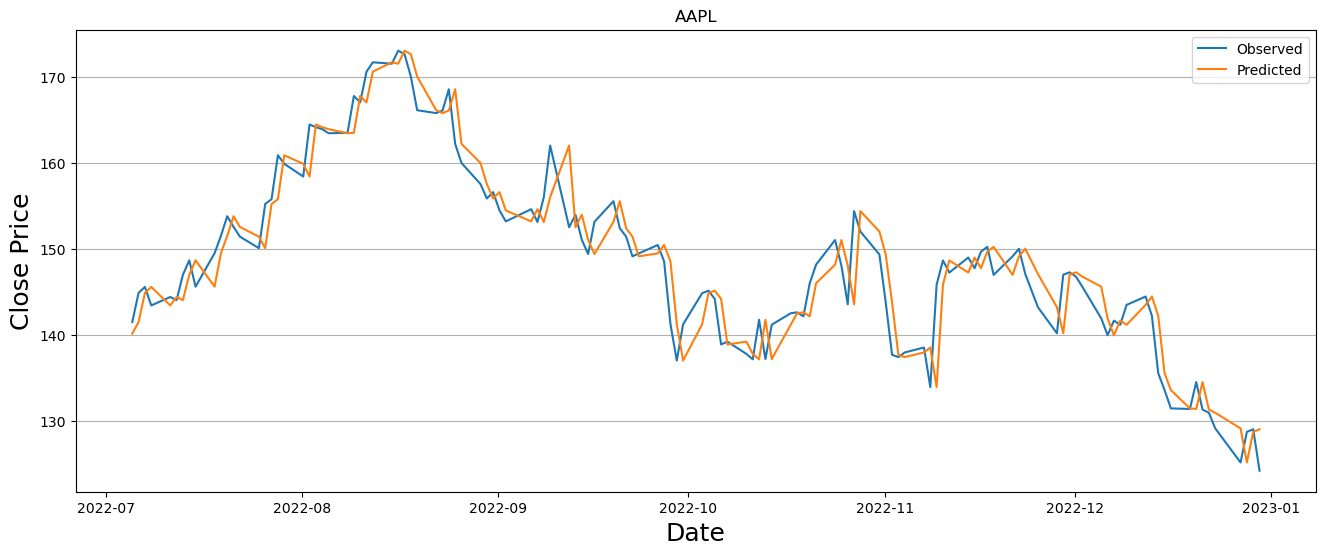

R^2: 0.9174235730830704
MSE: 17.320458510587553
RMSE: 4.1617854955040094
MAE: 3.2558726961650546
MAPE: 1.1245095754727386


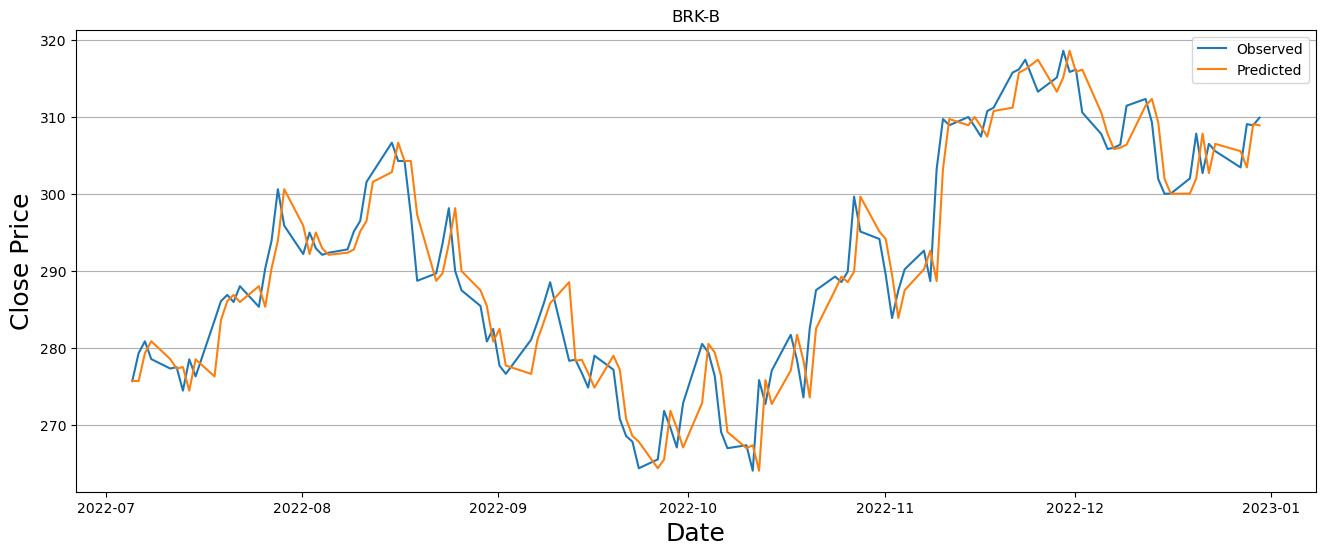

Average Evaluation Metrics
	R^2: 0.9094064417875857
	MSE: 19.14107263076555
	RMSE: 4.288380305373226
	MAE: 3.2331387151486033
	MAPE: 1.476871075891955


In [109]:
from src.models.Baseline.evaluate import eval
y_pred, y_true = eval(stocks=stocks)

R^2: 0.9037882581748691
MSE: 29.777199354404924
RMSE: 5.456848848411043
MAE: 4.040404369536053
MAPE: 1.6456182682698772


/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


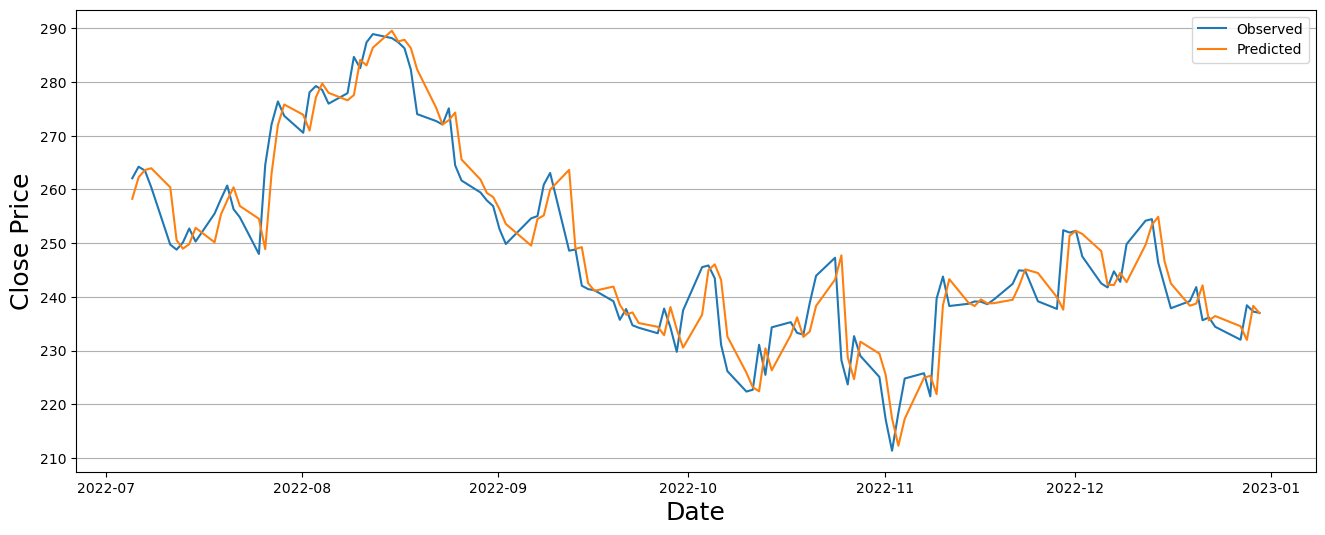

R^2: 0.9056333181662952
MSE: 10.822179110046045
RMSE: 3.2897080584827045
MAE: 2.5340344129796653
MAPE: 1.7211509227835646


/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


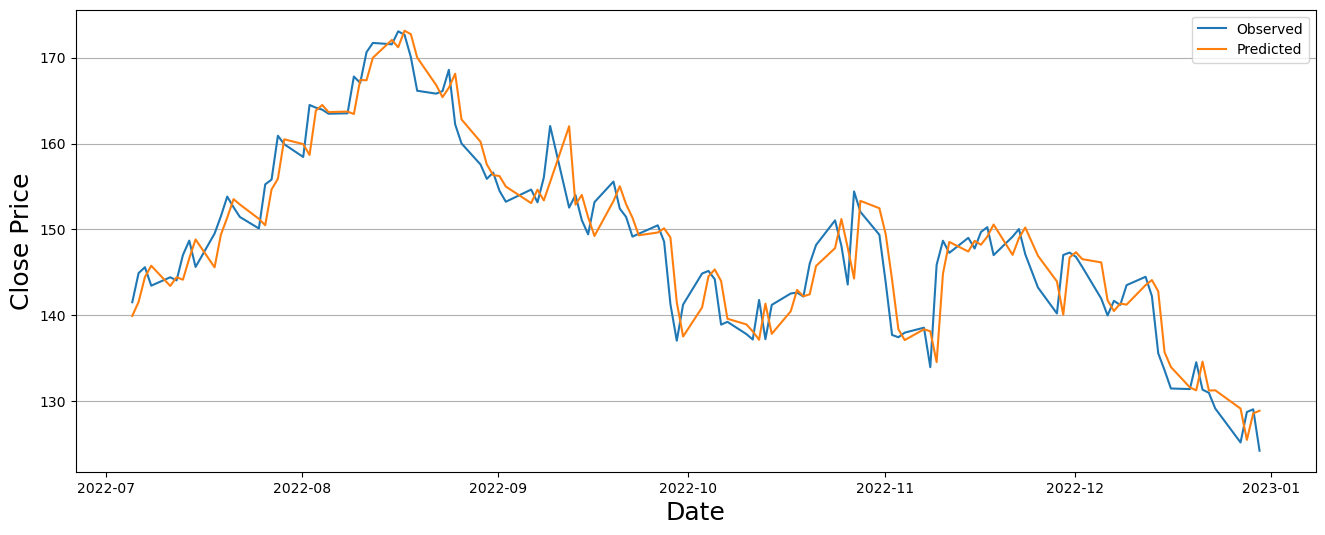

R^2: 0.9154747253383857
MSE: 17.729230575031803
RMSE: 4.210609287862245
MAE: 3.3213243502985845
MAPE: 1.1467613074373415


/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


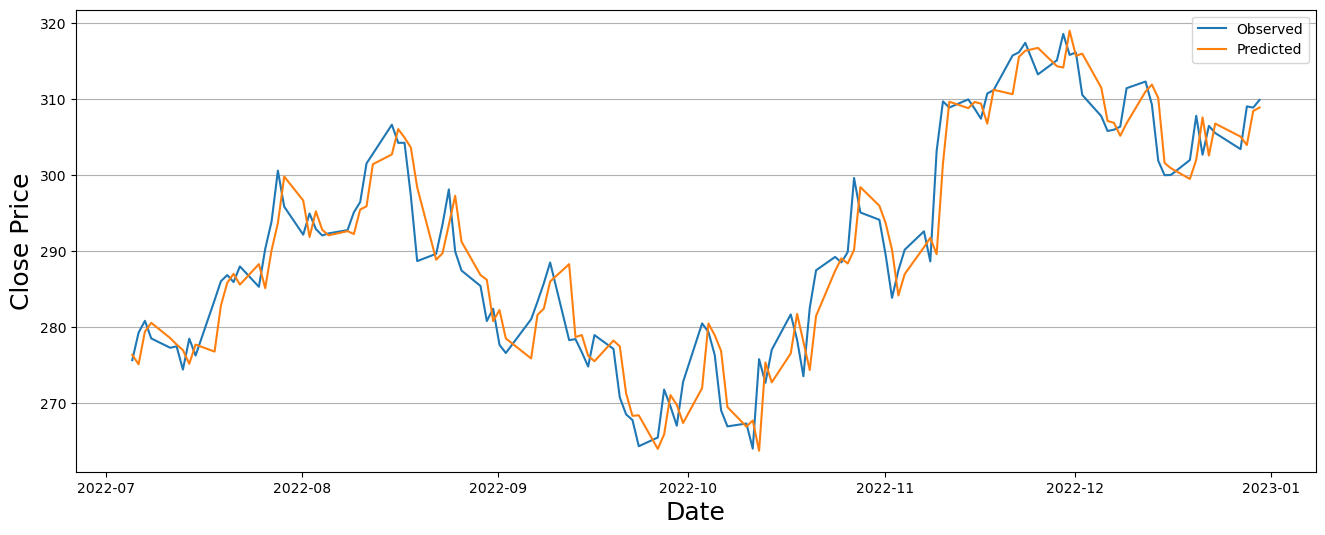

Average Evaluation Metrics
	R^2: 0.9082987672265167
	MSE: 19.44286967982759
	RMSE: 4.319055398251997
	MAE: 3.2985877109381008
	MAPE: 1.5045101661635947


In [110]:
from src.models.ARIMA.evaluate import eval

p, d, q = 2, 1, 3
run_id = "b535292cf0aa4b67aceb43ac213e66f9"
y_pred, y_true = eval(p, d, q, run_id, stocks)

R^2: 0.904632323448578
MSE: 29.515964088869
RMSE: 5.432859660332577
MAE: 4.037373127964804
MAPE: 1.6437975463956909


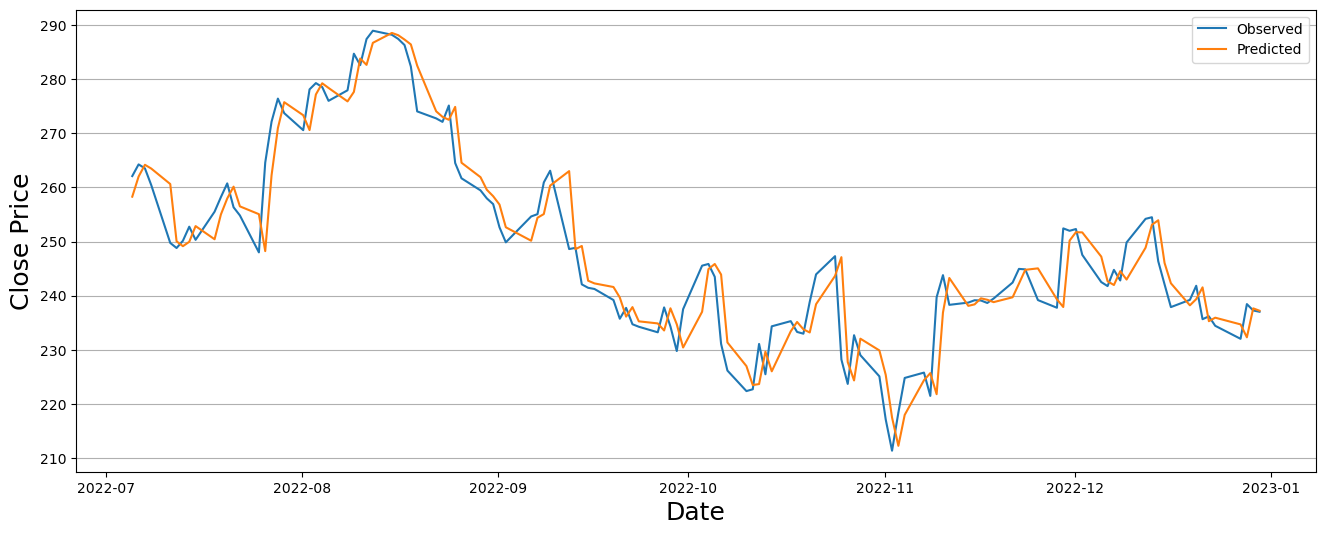

R^2: 0.9078523266208008
MSE: 10.567698328537958
RMSE: 3.2507996444779486
MAE: 2.490126095392523
MAPE: 1.6925034777522558


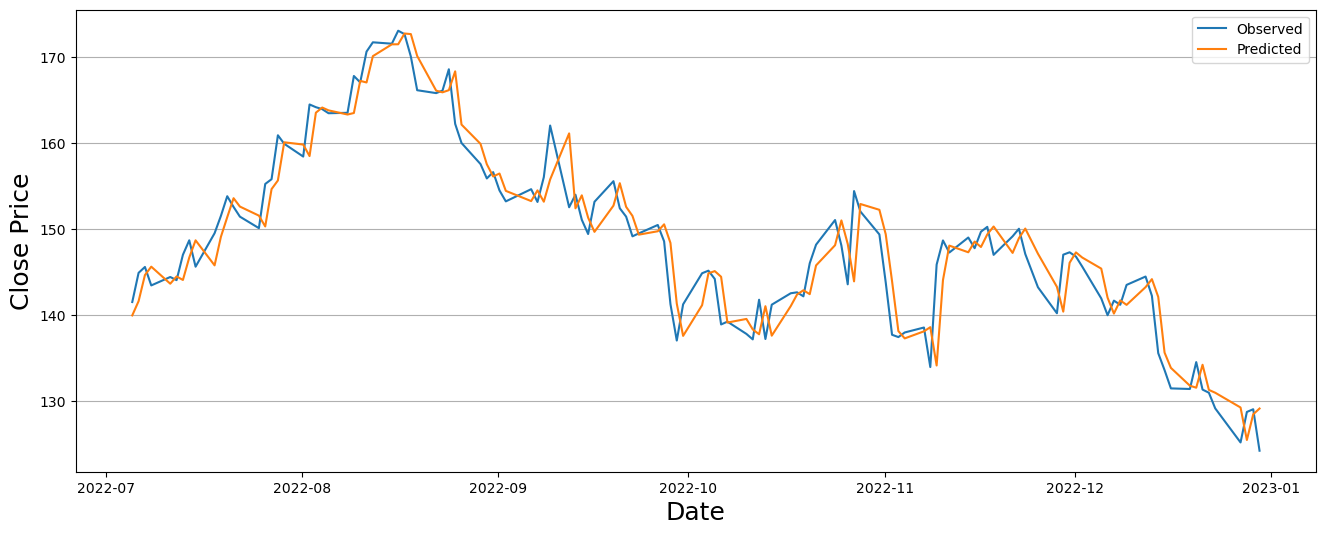

R^2: 0.9177523435342437
MSE: 17.251498697579628
RMSE: 4.1534923495270375
MAE: 3.248577842092769
MAPE: 1.1221536476078844


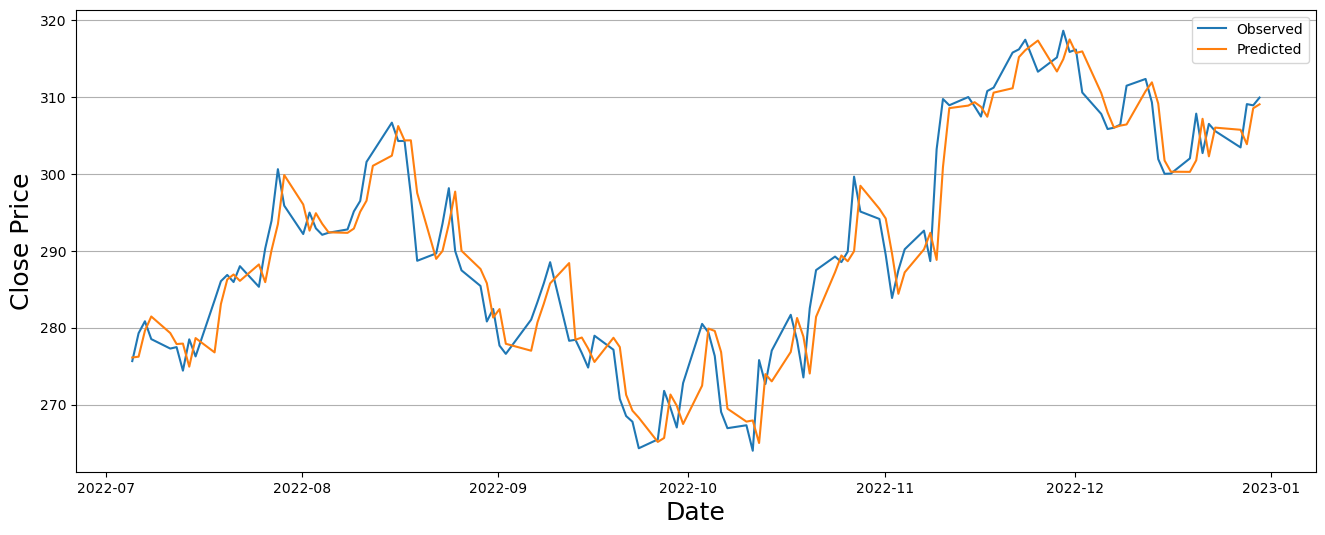

Average Evaluation Metrics
	R^2: 0.9100789978678742
	MSE: 19.111720371662194
	RMSE: 4.279050551445855
	MAE: 3.258692355150032
	MAPE: 1.4861515572519437


In [116]:
from src.models.Linear.evaluate import eval
run_id = "59ee53bdc13b4141b7b2acc273d0879f"
features = ['Close', 'High', 'RSI_14', 'TRANGE', '^FTSE', 'close_t-1', 'close_t-4', 'macdsignal']
y_pred, y_true = eval(run_id, features, stocks)

R^2: 0.7250679708057826
MSE: 85.4929186546318
RMSE: 9.246238081221563
MAE: 7.370961328262118
MAPE: 3.0085694114152495


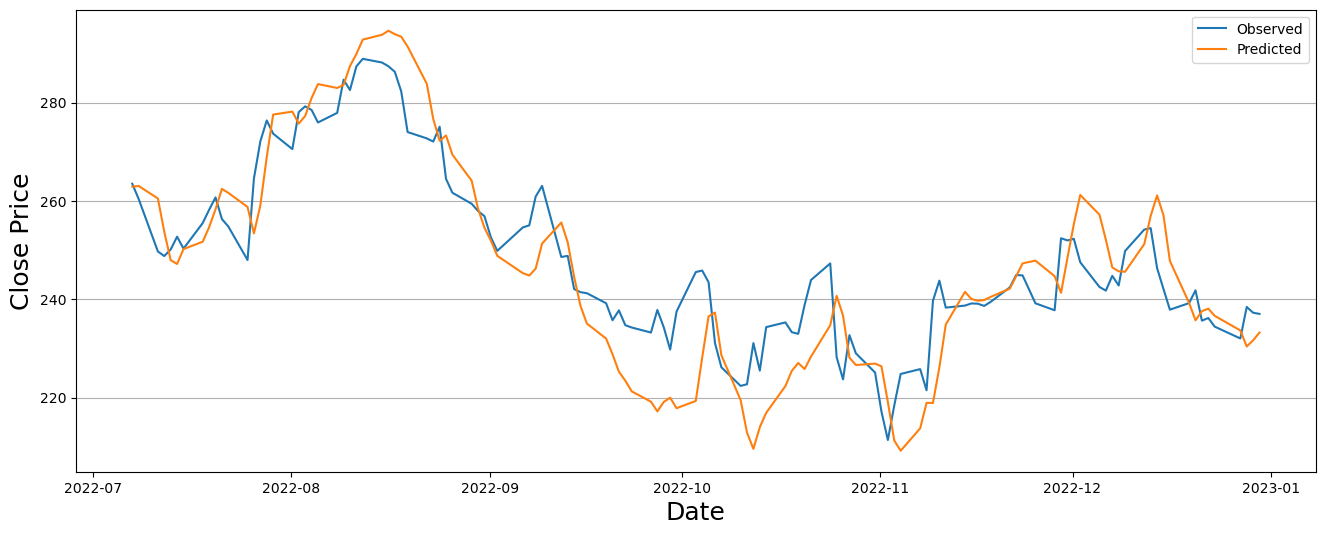

R^2: 0.7906527918338142
MSE: 24.28214874300259
RMSE: 4.927692030048407
MAE: 3.952611267325652
MAPE: 2.665748714386556


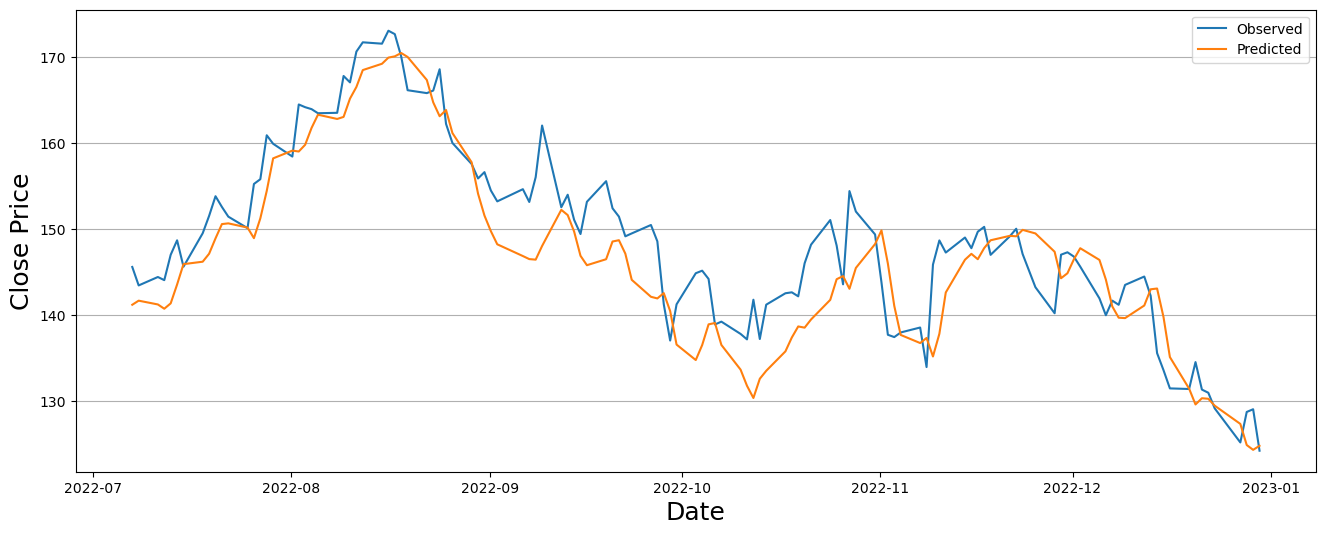

R^2: 0.6657183399617885
MSE: 70.21075283637994
RMSE: 8.379185690529834
MAE: 7.009864950502178
MAPE: 2.3637801429403336


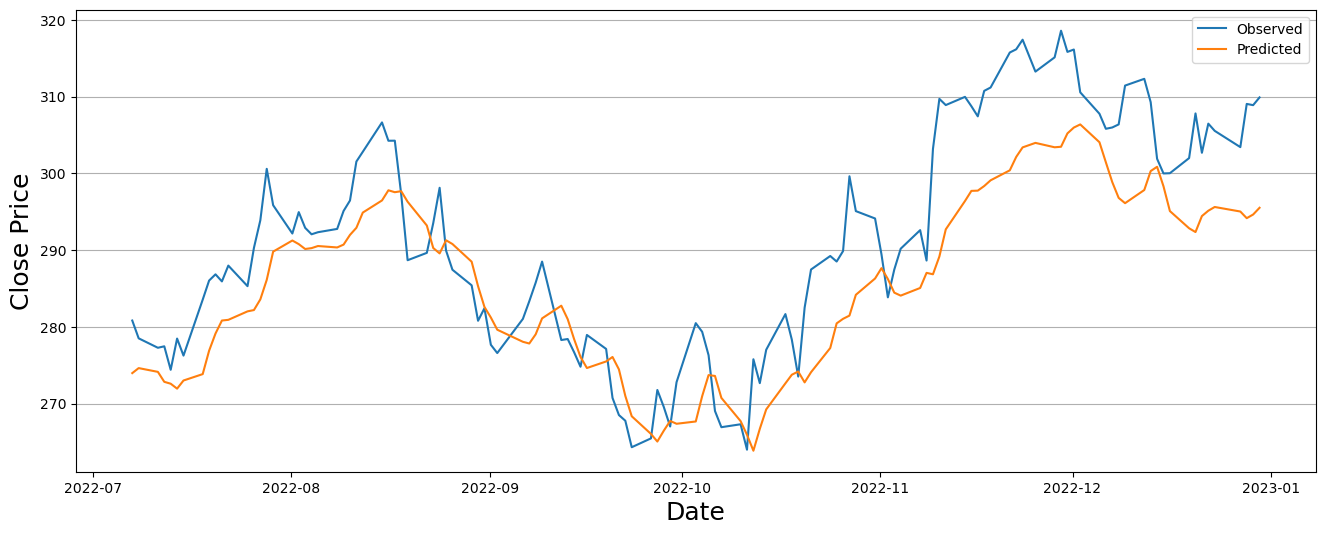

Average Evaluation Metrics
	R^2: 0.7271463675337951
	MSE: 59.99527341133811
	RMSE: 7.517705267266602
	MAE: 6.111145848696649
	MAPE: 2.679366089580713


In [120]:
from src.models.LSTM.evaluate import eval
features = ['Close', 'Volume', 'upper_band', 'middle_band', 'lower_band', 'SMA_3', 'SMA_5', 'SMA_10', 'SMA_20', 'SMA_50', 'EMA_3', 'EMA_5', 'EMA_10', 'EMA_20', 'EMA_50', 'ADX', 'aroon_down', 'aroon_up', 'macd', 'macdsignal', 'macdhist', 'RSI_14', 'slow_k', 'slow_d', 'williams_r', 'AD', 'OBV', 'NATR', 'TRANGE', 'fed_funds_rate', '^N225', '^IXIC', '^FTSE', '^SPX', '^DJI']
sequence_len = 3
run_id='157cc5c7f0114fe389ee9b8b049f465e'
y_pred, y_true = eval(features, sequence_len, run_id, stocks)

R^2: -0.3935329881904901
MSE: 160.50989
RMSE: 12.66925
MAE: 10.270969
MAPE: 6.697763502597809


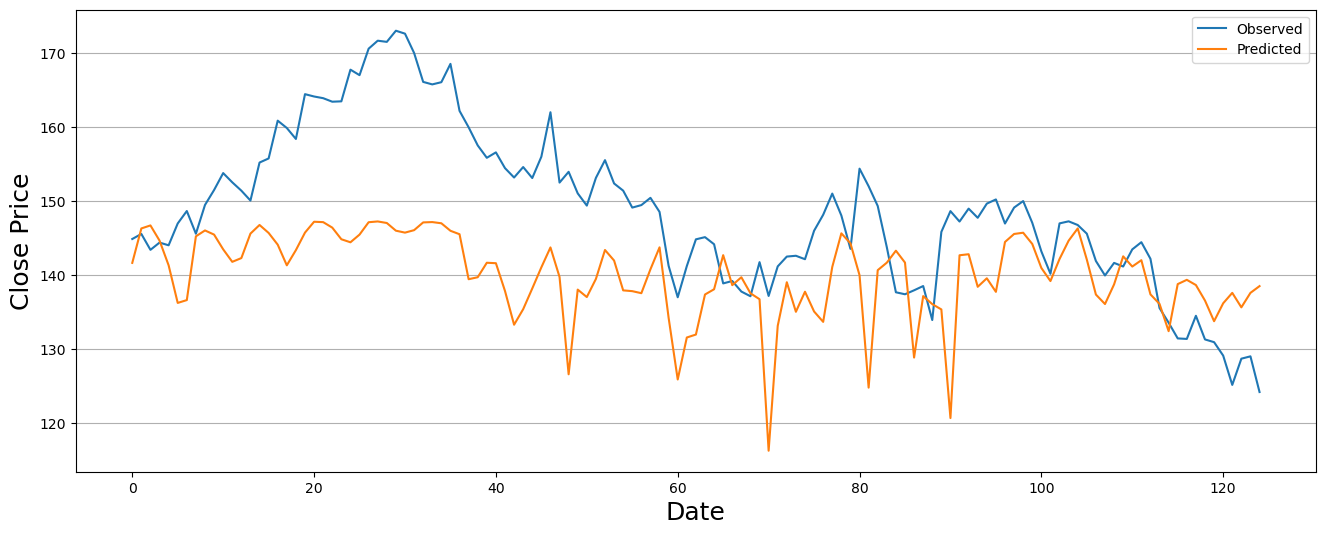

Average Evaluation Metrics
	R^2: -0.3935329881904901
	MSE: 160.5098876953125
	RMSE: 12.669249534606934
	MAE: 10.27096939086914
	MAPE: 6.697763502597809


In [121]:
from src.models.Transformer.evaluate import eval
features = ['Close', 'williams_r', 'aroon_down', 'aroon_up', 'TRANGE', 'RSI_14', 'OBV', 'AD']
sequence_len = 10
run_id='f7e4dd1a39d040b88f5424d88f148e4c'
y_pred, y_true = eval(features, sequence_len, run_id, stocks)